<a href="https://colab.research.google.com/github/kimyeseong984/ABCD-A/blob/main/%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

▶️ Upload your image file (e.g., my_cat_photo.jpg):


Saving sfasf.jpg to sfasf.jpg
✔️ Uploaded: sfasf.jpg

▶️ Running detection on sfasf.jpg with high sensitivity...

image 1/1 /content/sfasf.jpg: 640x640 5 cats, 9 dogs, 13.6ms
Speed: 3.4ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
🐱 Number of cats detected: 5

✔️ Annotated image saved as annotated_sfasf.jpg


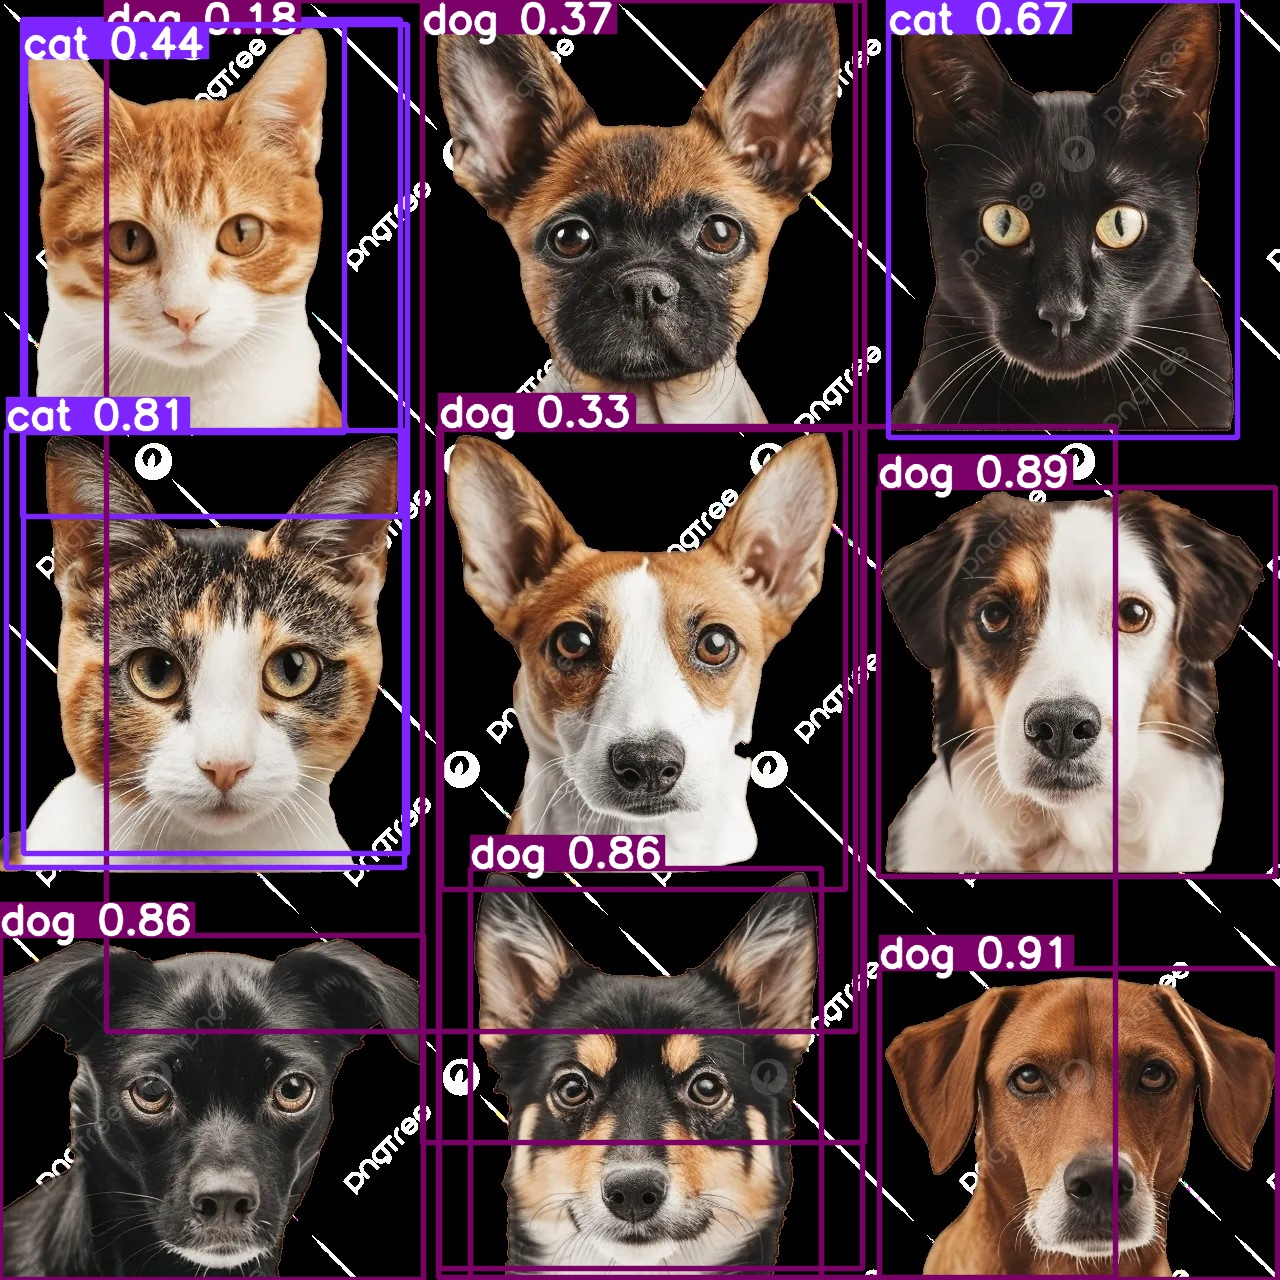

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1️⃣ Install dependencies
!pip install ultralytics --quiet

# 2️⃣ Import libraries
from ultralytics import YOLO
from google.colab import files
import cv2
from IPython.display import Image, display

# 3️⃣ Upload your image
print("▶️ Upload your image file (e.g., my_cat_photo.jpg):")
uploaded = files.upload()
filename = next(iter(uploaded))
print(f"✔️ Uploaded: {filename}\n")

# 4️⃣ Load the YOLOv8 model (COCO-pretrained)
model = YOLO('yolov8n.pt')  # you can switch to yolov8s.pt or custom weights

# 5️⃣ Perform inference (민감도↑)
print(f"▶️ Running detection on {filename} with high sensitivity...")
results = model(filename, conf=0.1)  # conf=0.1로 민감도(재현율) 높임[6][8]

# 6️⃣ Count cats and annotate
cat_detections = []
for box, cls in zip(results[0].boxes.xyxy.cpu().numpy(), results[0].boxes.cls.cpu().numpy()):
    if int(cls) == 15:
        cat_detections.append(box)
count = len(cat_detections)
print(f"🐱 Number of cats detected: {count}\n")

# 7️⃣ Visualize and save annotated result
annotated_path = 'annotated_' + filename
annotated_img = results[0].plot()  # returns numpy array (BGR)
cv2.imwrite(annotated_path, annotated_img)
print(f"✔️ Annotated image saved as {annotated_path}")
display(Image(annotated_path))

# 8️⃣ Download the annotated image
files.download(annotated_path)
